<a href="https://colab.research.google.com/github/sunithaam/Project_DSA/blob/main/DSA_Project_ECommerce_batch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract: Customer churn is crucial for any business.Knowing customer behaviour can enhance decision making.Here we are taking an E Commerce dataset for predicting customer churn.

Objective:Analyse E Commerce dataset and make a model to predict customer churn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
df = pd.read_excel('/content/E Commerce Dataset.xlsx',sheet_name='E Comm')
pickle.dump(  df, open( "df.pkl", "wb" ))

**Exploratory Data Analysis**

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.shape

(5630, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,264
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,251
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,255
NumberOfDeviceRegistered,0


In [ ]:
#%Percentage of null values in each column
round((df.isnull().sum()*100 / df.shape[0]),2)

,0
CustomerID,0.00
Churn,0.00
Tenure,4.69
PreferredLoginDevice,0.00
CityTier,0.00
WarehouseToHome,4.46
PreferredPaymentMode,0.00
Gender,0.00
HourSpendOnApp,4.53
NumberOfDeviceRegistered,0.00


In [ ]:
#Dropping CustomerID as it has no significance
df.drop('CustomerID',axis=1,inplace=True)

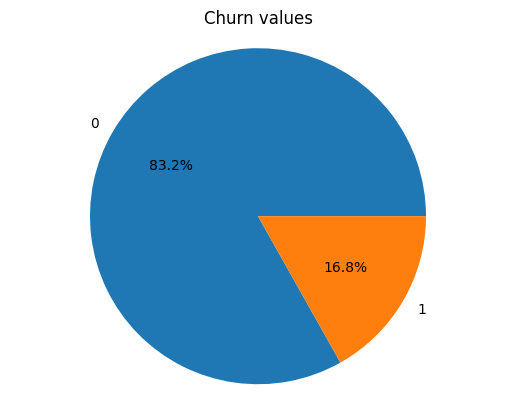

In [ ]:
def plot_pie_chart(df, column_name):
    column_counts = df['Churn'].value_counts()
    plt.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')
    plt.title(f'Churn values')
    plt.axis('equal')

    plt.show()

plot_pie_chart(df, 'Churn')

In [ ]:
#Grouping columns based on its type
int_columns=[ 'NumberOfDeviceRegistered','NumberOfAddress','CouponUsed','OrderCount']
float_columns = df.select_dtypes(include=['float']).columns
object_columns = df.select_dtypes(include=['object']).columns
ordinal_columns = df[['CityTier','SatisfactionScore', 'Complain' ]].columns

In [ ]:
for i in object_columns:
    print(df[i].value_counts().sort_values(ascending=False))

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [ ]:
#Replacing different text for same data with one text
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace(['Phone', 'Mobile Phone'], 'Mobile')

df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'COD': 'Cash on Delivery',
    'CC': 'Credit Card'
})


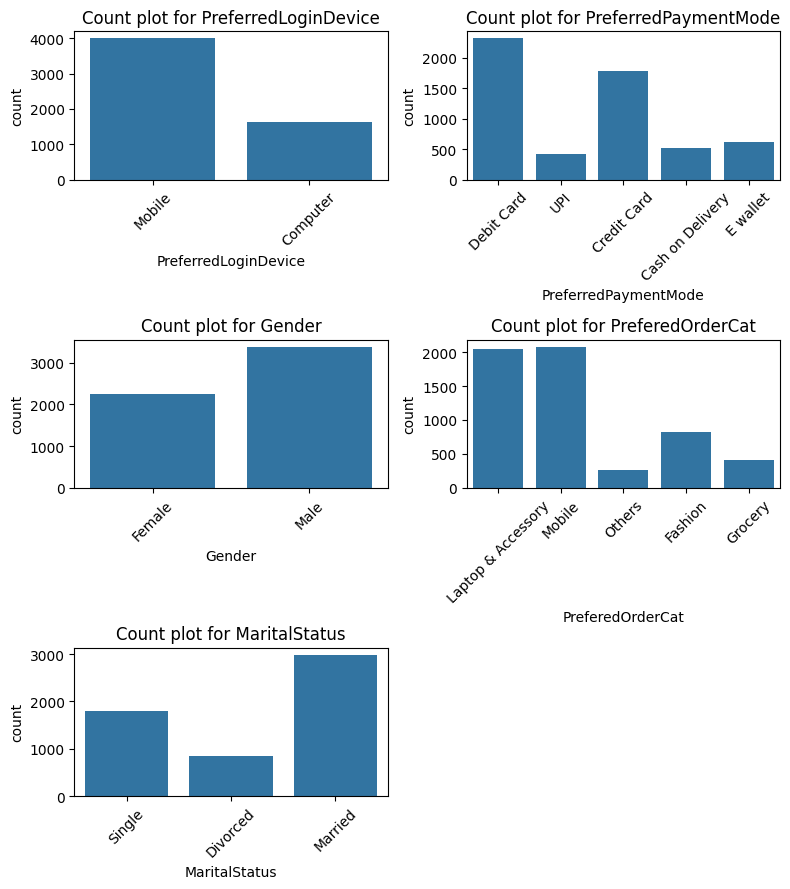

In [ ]:

n = len(object_columns)
rows = (n + 1) // 2
fig, axs = plt.subplots(rows, 2, figsize=(8, 3 * rows))
axs = axs.flatten()

for i, col in enumerate(object_columns):
    sns.countplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'Count plot for {col}')
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


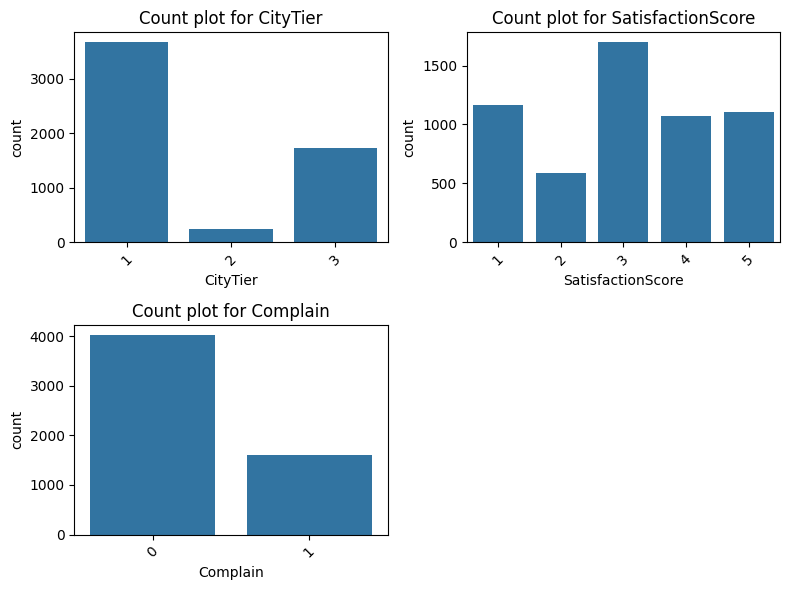

In [ ]:
n = len(ordinal_columns)
rows = (n + 1) // 2
fig, axs = plt.subplots(rows, 2, figsize=(8, 3 * rows))
axs = axs.flatten()

for i, col in enumerate(ordinal_columns):
    sns.countplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'Count plot for {col}')
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

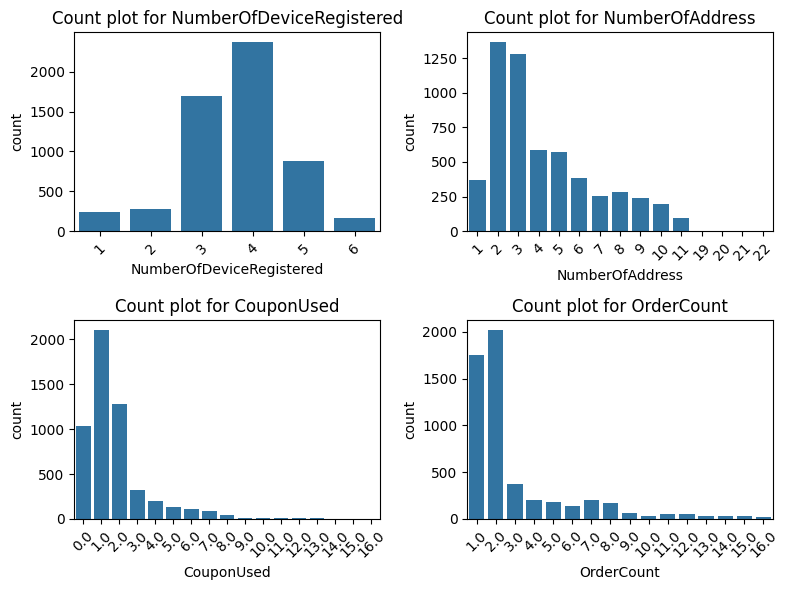

In [ ]:
n = len(int_columns)
rows = (n + 1) // 2
fig, axs = plt.subplots(rows, 2, figsize=(8, 3 * rows))
axs = axs.flatten()

for i, col in enumerate(int_columns):
    sns.countplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'Count plot for {col}')
    axs[i].set_xticks(axs[i].get_xticks())
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [ ]:
df[float_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


In [ ]:
#Bivaraite analysis of object columns with Churn

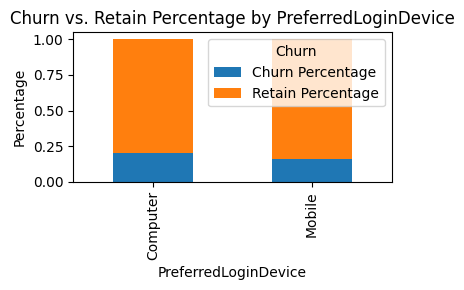

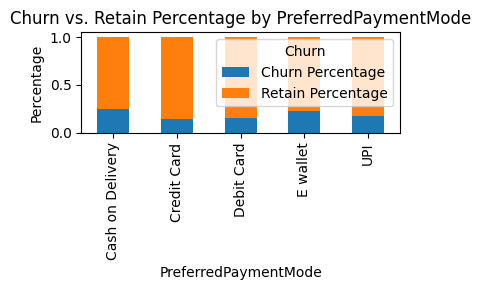

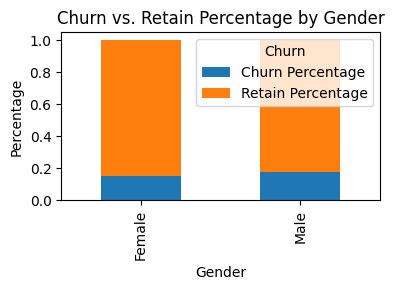

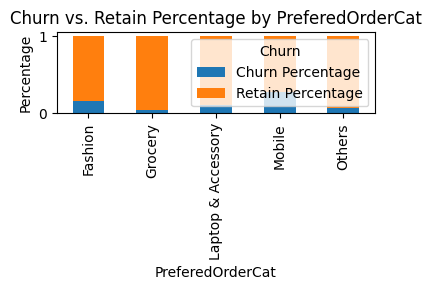

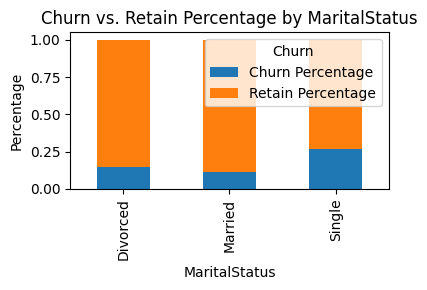

In [ ]:
for column in object_columns:
    counts=df.groupby([column, 'Churn']).size().reset_index(name='count')
    counts = counts.sort_values(by='count', ascending=False)
    totals = counts.groupby(column)['count'].sum().reset_index(name='total_count')
    counts = pd.merge(counts, totals, on=column, suffixes=('', '_total'))
    counts['percentage'] = (counts['count'] / counts['total_count']) * 100
    counts = counts.sort_values(by=[column, 'Churn'], ascending=[True, False])

    counts_pv=counts.pivot(index=column,columns='Churn',values='percentage')
    counts_pv['Total'] = counts_pv.sum(axis=1)
    counts_pv['Churn Percentage'] = counts_pv[1] / counts_pv['Total']
    counts_pv['Retain Percentage'] = counts_pv[0] / counts_pv['Total']


    fig, ax = plt.subplots(figsize=(4,3))
    counts_pv[['Churn Percentage', 'Retain Percentage']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Churn vs. Retain Percentage by {column}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Percentage')
    ax.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
#Observations
#Preferred log in method:There is no significant difference observed in terms of preferred log in device
#Preferred payment method:Those who paid by e wallet and cash on delivery showed slight increase in churn rate
#Gender:No significant difference observed in terms of gender
#Preferred order category:Increase in churn rate observed in Mobile category
#Marital status:Single status showed more churn rate

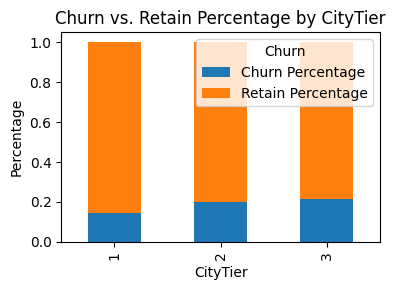

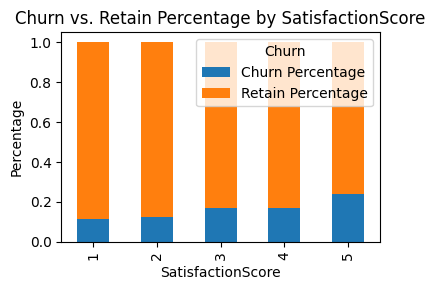

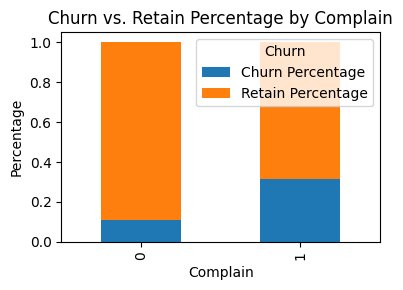

In [ ]:
#Ordinal columns:CityTier, Satisfaction Score, Complain

for column in ordinal_columns:
    counts=df.groupby([column, 'Churn']).size().reset_index(name='count')
    counts = counts.sort_values(by='count', ascending=False)
    totals = counts.groupby(column)['count'].sum().reset_index(name='total_count')
    counts = pd.merge(counts, totals, on=column, suffixes=('', '_total'))
    counts['percentage'] = (counts['count'] / counts['total_count']) * 100
    counts = counts.sort_values(by=[column, 'Churn'], ascending=[True, False])

    counts_pv=counts.pivot(index=column,columns='Churn',values='percentage')
    counts_pv['Total'] = counts_pv.sum(axis=1)
    counts_pv['Churn Percentage'] = counts_pv[1] / counts_pv['Total']
    counts_pv['Retain Percentage'] = counts_pv[0] / counts_pv['Total']
    fig, ax = plt.subplots(figsize=(4,3))
    counts_pv[['Churn Percentage', 'Retain Percentage']].plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Churn vs. Retain Percentage by {column}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Percentage')
    ax.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
#Observations
#City Tier:Majority of customers from Tier 1 but churn rate is more for tier 2 and 3
#Satisfaction score:High satisfaction score seems to be having higher churn rate contrary to expectation
#Complaint:Customers who have complained in last month had higher churn rate

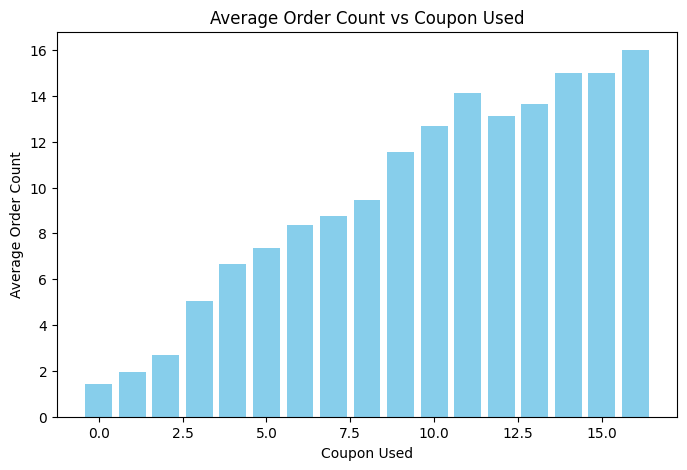

In [ ]:
# Filter the relevant columns: CouponUsed and OrderCount
coupon_data = df[['CouponUsed', 'OrderCount']]

# Group by CouponUsed and calculate the mean order count per coupon used
coupon_grouped = coupon_data.groupby('CouponUsed').mean().reset_index()

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(coupon_grouped['CouponUsed'], coupon_grouped['OrderCount'], color='skyblue')

# Add labels and title
plt.xlabel('Coupon Used')
plt.ylabel('Average Order Count')
plt.title('Average Order Count vs Coupon Used')

# Display the plot
plt.show()
#The average order count across different coupon usage levels seems relatively steady,
#indicating that customers who use coupons do not drastically increase their order count.


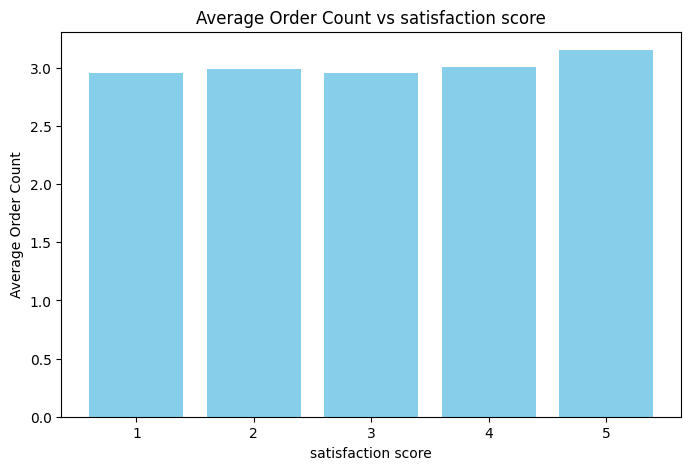

In [ ]:
# Filter the relevant columns: CouponUsed and OrderCount
satisfaction = df[['SatisfactionScore', 'OrderCount']]

# Group by CouponUsed and calculate the mean order count per coupon used
satis_grouped = satisfaction.groupby('SatisfactionScore').mean().reset_index()

# Plotting the data
plt.figure(figsize=(8, 5))
plt.bar(satis_grouped['SatisfactionScore'], satis_grouped['OrderCount'], color='skyblue')

# Add labels and title
plt.xlabel('satisfaction score')
plt.ylabel('Average Order Count')
plt.title('Average Order Count vs satisfaction score')

# Display the plot
plt.show()


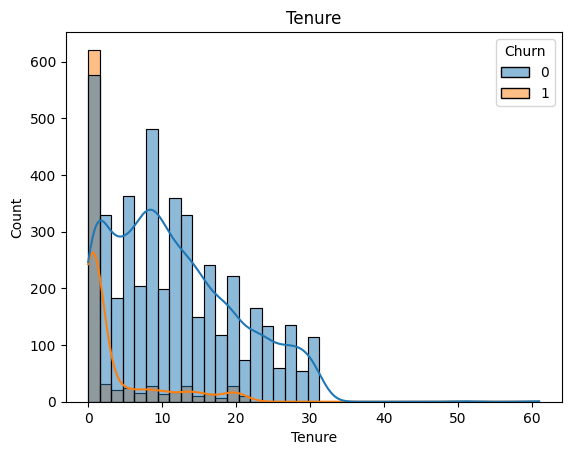

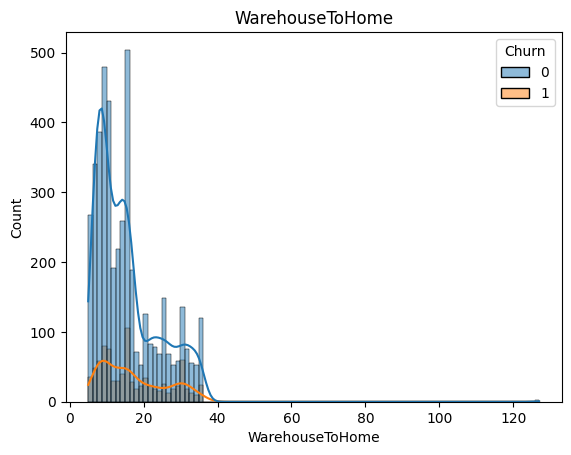

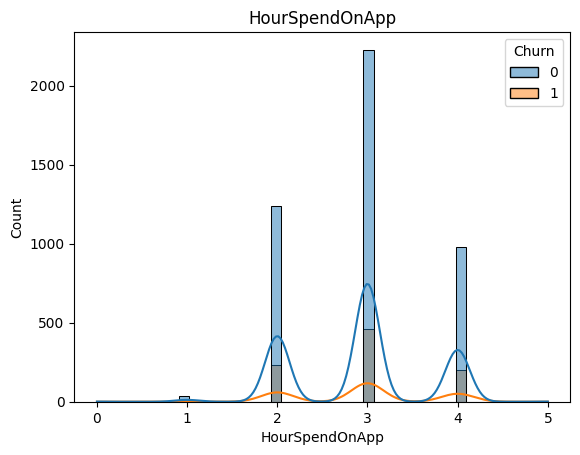

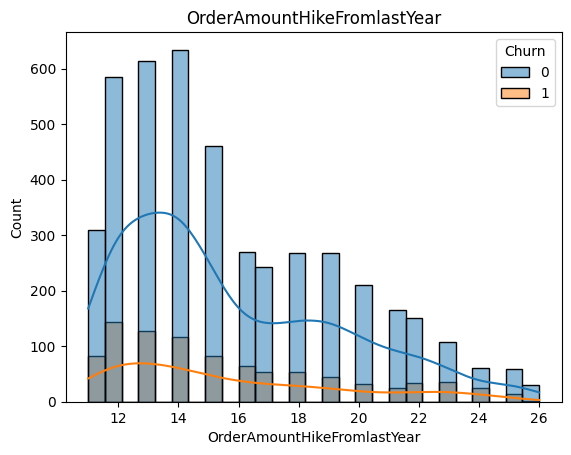

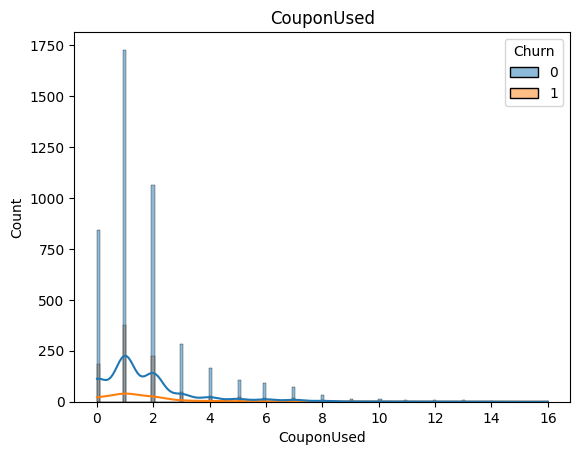

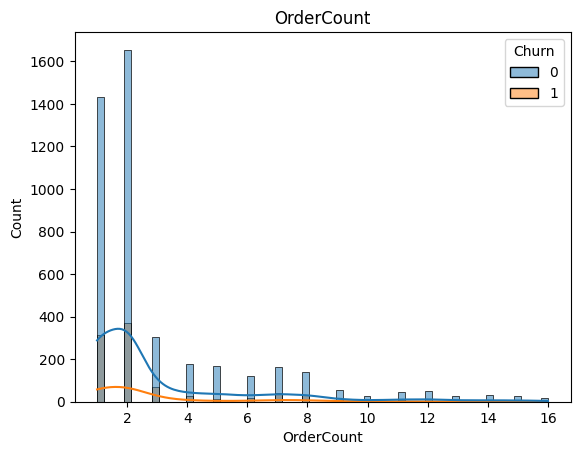

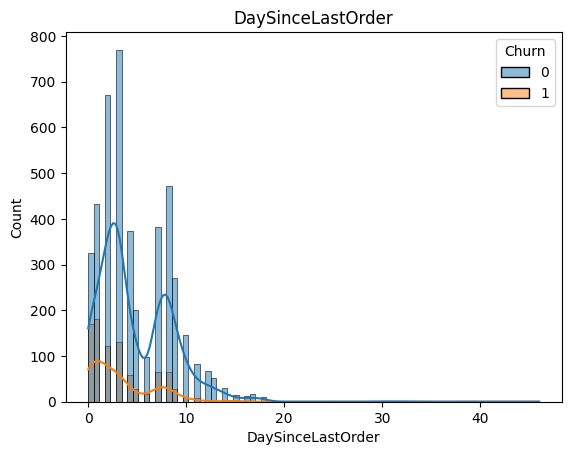

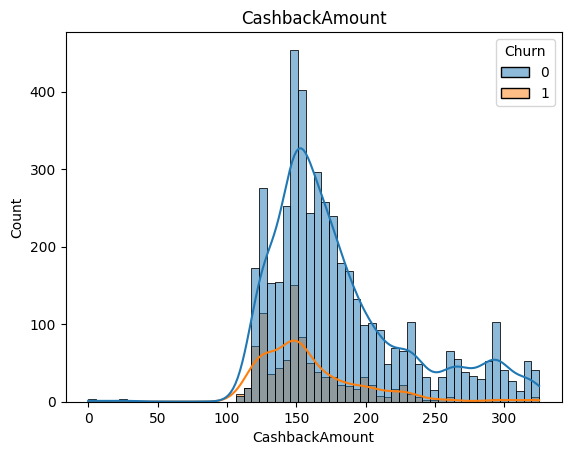

In [ ]:
#Hist plot for continuous numerical columns
for i in float_columns:
    sns.histplot(data=df,x=i,hue='Churn',stat='count',kde=True)
    plt.title(i)
    plt.show()

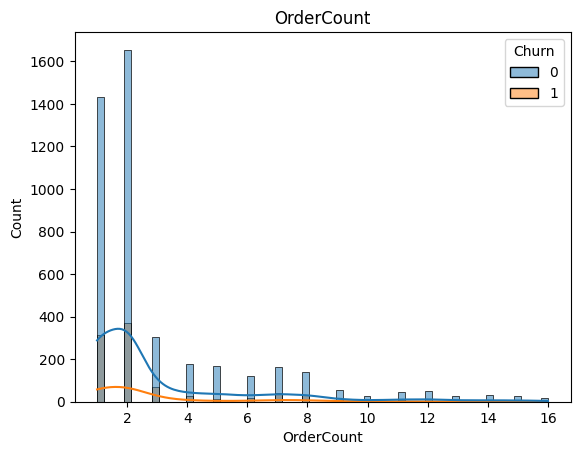

In [ ]:
sns.histplot(data=df,x='OrderCount',hue='Churn',stat='count',kde=True)
plt.title('OrderCount')
plt.show()

In [ ]:
#Observations
#Most of the customers are new users ie within 1 or 2 months
#Proximity to ware house:Distance for majority customers from warehouse was within 20km
#Hours spent:Most of the customers spend 2 to 4 hours on app
#Coupon used:Most of customers use 1/2 coupons


In [ ]:
df.select_dtypes(include=['number']).corr()['Churn']

,Churn
Churn,1.000000
Tenure,-0.349408
CityTier,0.084703
WarehouseToHome,0.076630
HourSpendOnApp,0.018675
NumberOfDeviceRegistered,0.107939
SatisfactionScore,0.105481
NumberOfAddress,0.043931
Complain,0.250188
OrderAmountHikeFromlastYear,-0.010058


In [ ]:
#Missing values are present only in float_columns
df[float_columns].corr()


,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Tenure,1.000000,-0.018218,-0.021226,0.005825,0.129035,0.186403,0.184552,0.476380
WarehouseToHome,-0.018218,1.000000,0.060990,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,-0.021226,0.060990,1.000000,0.106843,0.191528,0.109575,0.075716,0.121490
OrderAmountHikeFromlastYear,0.005825,0.038795,0.106843,1.000000,0.033201,0.023101,0.006003,0.017869
CouponUsed,0.129035,-0.003935,0.191528,0.033201,1.000000,0.745245,0.358930,0.286728
OrderCount,0.186403,0.002681,0.109575,0.023101,0.745245,1.000000,0.497928,0.360984
DaySinceLastOrder,0.184552,0.017829,0.075716,0.006003,0.358930,0.497928,1.000000,0.347172
CashbackAmount,0.476380,-0.009200,0.121490,0.017869,0.286728,0.360984,0.347172,1.000000


**PREPROCESSING**


In [ ]:
#Filling missing values
#Since correlation between CouponUsed and OrderCount observed,missing values in these columns can be filled based on each other


In [ ]:
x=df[['CouponUsed','OrderCount']].groupby('CouponUsed')['OrderCount'].mean()
x=round(x)
y=df[['OrderCount','CouponUsed']].groupby('OrderCount')['CouponUsed'].mean()
y=round(y)


In [ ]:
new_order=[]
df['OrderCount'].fillna('ab',inplace=True)
for i in range(len(df)):

    if df.loc[i]['OrderCount']=='ab':
        CouponUsed=df.loc[i]['CouponUsed']
        new_order.append(x[CouponUsed])
    else:

        new_order.append(df.loc[i]['OrderCount'])
df['OrderCount']=new_order
new_coupon=[]
df['CouponUsed'].fillna('ab',inplace=True)
for i in range(len(df)):

    if df.loc[i]['CouponUsed']=='ab':
        OrderCount=df.loc[i]['OrderCount']
        new_coupon.append(y[OrderCount])
    else:

        new_coupon.append(df.loc[i]['CouponUsed'])
df['CouponUsed']=new_coupon


<ipython-input-76-617170ac7d7f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OrderCount'].fillna('ab',inplace=True)
<ipython-input-76-617170ac7d7f>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'ab' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['OrderCount'].fillna('ab',inplace=True)
<ipython-input-76-617170ac7d7f>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or

In [ ]:
#For other columns,since null values constitute less than 6% and
#not much correlation found with other columns,it can be filled with median


In [ ]:
from sklearn.impute import SimpleImputer
null_columns = df.columns[df.isnull().any()]
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputer=imp_median.fit(df[null_columns])
df_imp=imputer.transform(df[null_columns])
df_imp=pd.DataFrame(df_imp)
df_imp.columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'OrderAmountHikeFromlastYear',
       'DaySinceLastOrder']
df[null_columns]=df_imp[null_columns]

In [ ]:
df.isnull().sum()

,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0


Handling outliers

In [ ]:
# Calculate IQR for numerical columns
Q1 = df[float_columns].quantile(0.25)
Q3 = df[float_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[float_columns] < lower_bound) | (df[float_columns] > upper_bound)).sum()
print(outliers)

Tenure                           4
WarehouseToHome                  2
HourSpendOnApp                   6
OrderAmountHikeFromlastYear     33
CouponUsed                     700
OrderCount                     759
DaySinceLastOrder               62
CashbackAmount                 438
dtype: int64


In [ ]:
outlier_columns=['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CashbackAmount']
for i in outlier_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    # # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # # Identify outliers
    df[i] = np.where(df[i] > upper_bound, upper_bound, np.where(df[i] < lower_bound, lower_bound, df[i]))

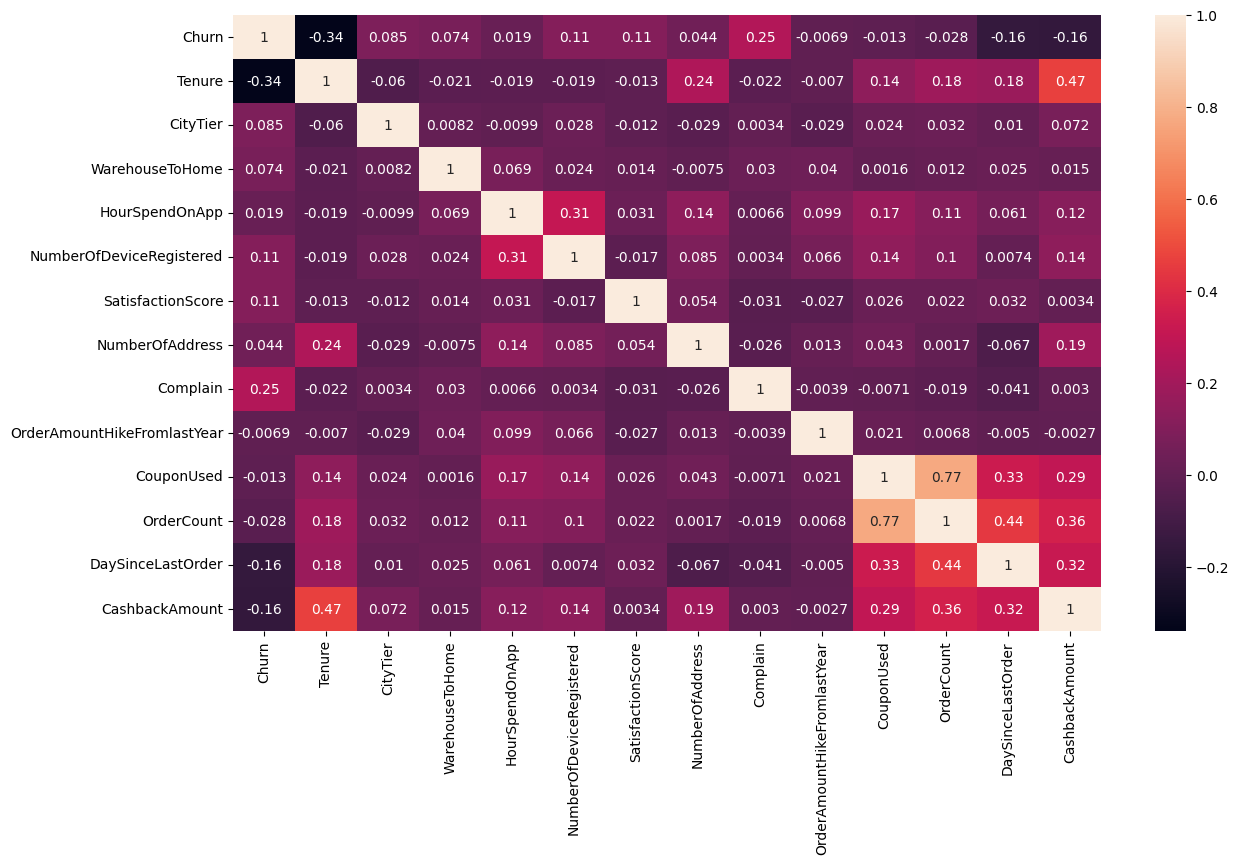

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Coupon used and order count were highly correlated around 0.75

In [ ]:

#Encoding
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
                       'MaritalStatus', 'PreferedOrderCat'] # Fixed typo here

# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the selected columns of the DataFrame
encoded_data = encoder.fit_transform(df[categorical_columns])

# Convert the encoded data to a DataFrame with appropriate column names
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_columns) # Convert to dense array

# Concatenate the encoded columns with the original dataset (dropping the original categorical columns)
ecomm_data_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)

# Show the first few rows of the transformed dataset
ecomm_data_encoded.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
ecomm_data_encoded.shape

(5630, 31)

**Defining feature(x) and label (y)**

In [ ]:
x=ecomm_data_encoded.drop('Churn',axis=1)
y=ecomm_data_encoded['Churn']

Splitting data in to training,validation and test data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,test_size=0.5,random_state=42)

**Handling imbalance in data using SMOTE**

In [ ]:
#Sampling
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(x_train, y_train)
# Display class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_smote.value_counts())


Class Distribution After SMOTE:
Churn
0    2797
1    2797
Name: count, dtype: int64


**Feature selection**

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
k_best_mi = SelectKBest(score_func=mutual_info_classif, k=5)  # Adjust 'k' based on your preference
X_mi = k_best_mi.fit_transform(X_smote, y_smote)
print("List of Selected Features:", k_best_mi.get_support(indices=True))
X_smote.columns[k_best_mi.get_support(indices=True)]

List of Selected Features: [ 0  2  8  9 11]


Index(['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'DaySinceLastOrder'],
      dtype='object')

**SCALING OF DATA**

In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib
sc=StandardScaler()Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','DaySinceLastOrder'
x_smote_scaled=sc.fit_transform(X_smote[[']])
x_test2_scaled=sc.transform(x_test[['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','DaySinceLastOrder']])
x_val2_scaled=sc.transform(x_val[['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','DaySinceLastOrder']])
joblib.dump(sc,'sc.pkl')

['sc.pkl']

**MODEL SELECTION WITH CROSS VALIDATION AND HYPERPARAMETER TUNING**

In [ ]:
def print_results(results):
  print('BEST PARAMS: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

**LOGISTIC REGRESSION**

In [ ]:
lr=LogisticRegression()
parameters={
    'C':[0.001,0.01,0.1,1,10,100,1000]
}
cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(x_smote_scaled,y_smote)
print_results(cv)

BEST PARAMS: {'C': 0.001}

0.763 (+/-0.007) for {'C': 0.001}
0.759 (+/-0.019) for {'C': 0.01}
0.759 (+/-0.022) for {'C': 0.1}
0.759 (+/-0.021) for {'C': 1}
0.759 (+/-0.021) for {'C': 10}
0.759 (+/-0.021) for {'C': 100}
0.759 (+/-0.021) for {'C': 1000}


In [ ]:
cv.best_estimator_

LogisticRegression(C=0.001)

In [ ]:
joblib.dump(cv.best_estimator_,'LR.pkl')

['LR.pkl']

**SVM**

In [ ]:
svc=SVC()
parameters={
    'kernel':['linear','rbf'],
    'C':[0.1,1,10]
}
cv=GridSearchCV(svc,parameters,cv=5)
cv.fit(x_smote_scaled,y_smote)
print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'rbf'}

0.75 (+/-0.016) for {'C': 0.1, 'kernel': 'linear'}
0.774 (+/-0.011) for {'C': 0.1, 'kernel': 'rbf'}
0.751 (+/-0.015) for {'C': 1, 'kernel': 'linear'}
0.798 (+/-0.014) for {'C': 1, 'kernel': 'rbf'}
0.751 (+/-0.015) for {'C': 10, 'kernel': 'linear'}
0.822 (+/-0.012) for {'C': 10, 'kernel': 'rbf'}


In [ ]:
cv.best_estimator_

SVC(C=10)

In [ ]:
joblib.dump(cv.best_estimator_,'SVM.pkl')

['SVM.pkl']

**RANDOM FOREST**

In [ ]:
rf=RandomForestClassifier()
parameters={'n_estimators':[5,50,250],
            'max_depth':[2,4,8,16,32,None]}

cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(x_smote_scaled,y_smote)
print_results(cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.795 (+/-0.039) for {'max_depth': 2, 'n_estimators': 5}
0.811 (+/-0.023) for {'max_depth': 2, 'n_estimators': 50}
0.812 (+/-0.022) for {'max_depth': 2, 'n_estimators': 250}
0.819 (+/-0.028) for {'max_depth': 4, 'n_estimators': 5}
0.815 (+/-0.028) for {'max_depth': 4, 'n_estimators': 50}
0.816 (+/-0.024) for {'max_depth': 4, 'n_estimators': 250}
0.857 (+/-0.074) for {'max_depth': 8, 'n_estimators': 5}
0.866 (+/-0.068) for {'max_depth': 8, 'n_estimators': 50}
0.866 (+/-0.073) for {'max_depth': 8, 'n_estimators': 250}
0.897 (+/-0.116) for {'max_depth': 16, 'n_estimators': 5}
0.908 (+/-0.108) for {'max_depth': 16, 'n_estimators': 50}
0.909 (+/-0.109) for {'max_depth': 16, 'n_estimators': 250}
0.895 (+/-0.104) for {'max_depth': 32, 'n_estimators': 5}
0.91 (+/-0.116) for {'max_depth': 32, 'n_estimators': 50}
0.91 (+/-0.105) for {'max_depth': 32, 'n_estimators': 250}
0.895 (+/-0.114) for {'max_depth': None, 'n_estimators': 5}
0.91 (+/-0.10

In [ ]:
cv.best_estimator_

RandomForestClassifier(max_depth=32, n_estimators=250)

In [ ]:
joblib.dump(cv.best_estimator_,'RF.pkl')

**GRADIENT BOOST**

In [ ]:
gb=GradientBoostingClassifier()
parameters={
    'n_estimators':[5,50,250,500],
    'max_depth':[1,3,5,7,9],
    'learning_rate':[0.01,0.1,10,100]
}
cv=GridSearchCV(gb,parameters,cv=5)
cv.fit(x_smote_scaled,y_smote)
print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 250}

0.763 (+/-0.023) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.761 (+/-0.02) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.773 (+/-0.022) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.799 (+/-0.018) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.797 (+/-0.027) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.797 (+/-0.027) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.807 (+/-0.035) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.836 (+/-0.073) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.81 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.05) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.85 (+/-0.066) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.872 (+/-0.129) for {'learning_rate'

In [ ]:
cv.best_estimator_

GradientBoostingClassifier(max_depth=9, n_estimators=250)

In [ ]:
joblib.dump(cv.best_estimator_,'GB.pkl')

['GB.pkl']

**Comparing performances of each model**

In [ ]:
models={}
for mdl in ['LR','SVM','RF','GB']:
  models[mdl]=joblib.load(f'{mdl}.pkl')

In [ ]:
models

{'LR': LogisticRegression(C=0.001),
 'SVM': SVC(C=10),
 'RF': RandomForestClassifier(n_estimators=250),
 'GB': GradientBoostingClassifier(max_depth=9, n_estimators=250)}

In [ ]:
from time import time
def evaluate_model(name,model,features,labels):
  start=time()
  pred=model.predict(features)
  end=time()
  accuracy=round(accuracy_score(labels,pred),3)
  precision=round(precision_score(labels,pred),3)
  recall=round(recall_score(labels,pred),3)
  latency=round((end-start),3)
  print('{} --Accuracy:{} / Precision : {} /Recall : {} /Latency {} ms'.format(name,accuracy,precision,recall,latency))

In [ ]:
for name,mdl in models.items():
  evaluate_model(name,mdl,x_val2_scaled,y_val)

LR --Accuracy:0.681 / Precision : 0.312 /Recall : 0.765 /Latency 0.001 ms
SVM --Accuracy:0.785 / Precision : 0.417 /Recall : 0.738 /Latency 0.283 ms
RF --Accuracy:0.874 / Precision : 0.638 /Recall : 0.556 /Latency 0.074 ms
GB --Accuracy:0.898 / Precision : 0.72 /Recall : 0.631 /Latency 0.025 ms


In [ ]:
evaluate_model('RandomForest',models['RF'],x_test2_scaled,y_test)

RandomForest --Accuracy:0.885 / Precision : 0.658 /Recall : 0.589 /Latency 0.075 ms


In [ ]:
evaluate_model('GradientBoost',models['GB'],x_test2_scaled,y_test)

GradientBoost --Accuracy:0.916 / Precision : 0.774 /Recall : 0.667 /Latency 0.031 ms


**RandomForest and GradientBoost algorithm found to be performing better for this dataset**

**Cross checking predicted values**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier(max_depth=30,n_estimators=250)
rf2.fit(x_smote_scaled,y_smote)
y_pred=rf2.predict(x_test2_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,r2_score, mean_absolute_error
from time import time
start=time()
pred=rf2.predict(x_test2_scaled)
end=time()
accuracy=round(accuracy_score(y_test,pred),3)
precision=round(precision_score(y_test,pred),3)
recall=round(recall_score(y_test,pred),3)
latency=round((end-start),3)
print('--Accuracy:{} / Precision : {} /Recall : {} /Latency {} ms'.format(accuracy,precision,recall,latency))

In [ ]:
features=[[11,6,13,0,0]]
f=sc.transform(features)
rf2.predict(f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb2=GradientBoostingClassifier(max_depth=30,n_estimators=250)
gb2.fit(x_smote_scaled,y_smote)
y_pred=gb2.predict(x_test2_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,r2_score, mean_absolute_error
from time import time
start=time()
pred=gb2.predict(x_test2_scaled)
end=time()
accuracy=round(accuracy_score(y_test,pred),3)
precision=round(precision_score(y_test,pred),3)
recall=round(recall_score(y_test,pred),3)
latency=round((end-start),3)
print('--Accuracy:{} / Precision : {} /Recall : {} /Latency {} ms'.format(accuracy,precision,recall,latency))

--Accuracy:0.869 / Precision : 0.585 /Recall : 0.611 /Latency 0.028 ms


In [ ]:
features=[[11,6,13,0,0]]
f=sc.transform(features)
gb2.predict(f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])